<a href="https://colab.research.google.com/github/yuanhenglee/1102-Data-Science-for-Cybersecurity/blob/master/Assignment/H_ZeroAccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ZeroAccess

An interesting data set
* Where ZeroAccess occurs? Any patterns?
* What kind of users are easily to be infected? Does education or income affect infection rate?
* Does UFO cause ZeroAccess infection?



### Quesion #0:

Your name, student ID, department. If you skip this question, no points will be given. Also, you cannot share your file to any other one. If you have any question, post a message in the class forum (https://groups.google.com/g/nccu-ds4s).


Answer #0:

Your name, student ID, department.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
z_df = pd.read_csv("https://drive.google.com/uc?id=13iE3A-OO_oWZrEvDmpN_nA6yPfLpCiZv") # zeroaccess.csv
s_df = pd.read_csv("https://drive.google.com/uc?id=13nE04n2MwRAMFSPxS96dYMe1RYgZujxS") # state-internets.csv
c_df = pd.read_csv("https://drive.google.com/uc?id=13qH1zWX4FQGNo43m_7ufSsDUbYUxa81O") # county-data.csv

In [ ]:
print(z_df.shape, s_df.shape, c_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [ ]:
z_df.head()

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484


In [ ]:
s_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [ ]:
c_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


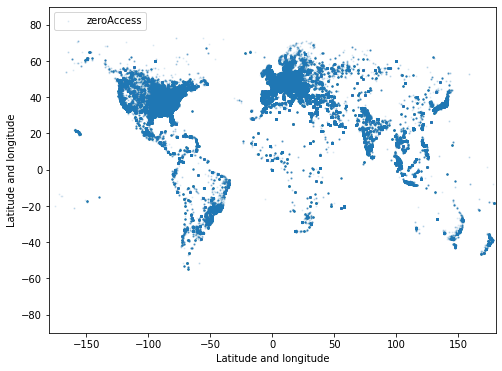

In [ ]:
# plot zeroAccess infection instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [ ]:
# https://python-visualization.github.io/folium/quickstart.html

import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip(list(z_df.lat), (z_df.long)))[:10000] # <-- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

### Reverse Geocoding



In [ ]:
!pip install reverse_geocoder

     |████████████████████████████████| 2.2 MB 5.1 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=ade6ab3617fb77412a963ce37d32adbb0a47a2a776eff53ab050bd3eb4393751
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder


In [ ]:
import reverse_geocoder

# {'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 
#  'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}

# quick implementation
def rgr(s):
  cord_li = [(s[0], s[1])]
  result_dict_li = reverse_geocoder.search(cord_li)
  ret_ser = pd.Series(dict(result_dict_li[0]))
  return ret_ser.drop(labels=['lat', 'lon'])

# batch implementation
def rgr_batch(lat_long_df):
  cord_li = []
  for ind in lat_long_df.index:
    cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
  result_dict_li = reverse_geocoder.search(cord_li)
  return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)

In [ ]:
# quick implementation
'''
sample_df = z_df.head(50) # <------ only use some data, because it takes time
country_df = sample_df.apply(lambda s: rgr(s), axis = 1)
df = sample_df.join(country_df)
df
'''

'\nsample_df = z_df.head(50) # <------ only use some data, because it takes time\ncountry_df = sample_df.apply(lambda s: rgr(s), axis = 1)\ndf = sample_df.join(country_df)\ndf\n'

In [ ]:
# batch implementation
sample_df = z_df.head(50000) # <------ only use some data, because it takes time
country_df = rgr_batch(sample_df)
df = sample_df.join(country_df).rename(columns={'name':'City', 'admin1': 'State', 'admin2':'County', 'cc':"country_code", })
df

Loading formatted geocoded file...


,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
...,...,...,...,...,...,...
49995,53.1271,18.0200,Bydgoszcz,Kujawsko-Pomorskie,Bydgoszcz,PL
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49997,43.5417,21.7078,Aleksinac,Central Serbia,Nisavski Okrug,RS
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


### Question #1:
Plot a figure to show # of attack in each country

### Question #2:

Plot a figure to show % of attack in each country
Ignore countries that are < 1%

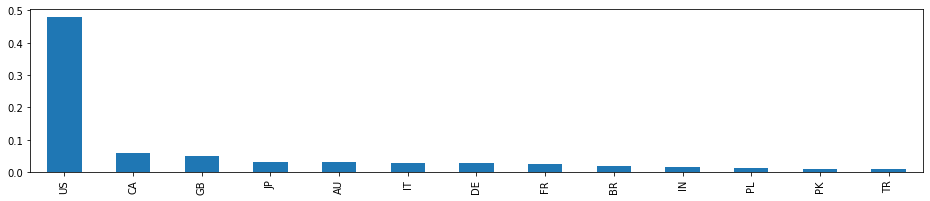

US    0.47974
CA    0.05932
GB    0.05128
JP    0.03008
AU    0.03002
IT    0.02964
DE    0.02824
FR    0.02622
BR    0.01928
IN    0.01496
PL    0.01154
PK    0.01096
TR    0.01052
Name: country_code, dtype: float64

### Question #3:

Only show US data and map.
Show US state data.

Which state/ciry has severe attack? Why?

Hint: recall a network tool named 'whois' ...


In [ ]:
us_df = df[df.country_code == 'US']
us_df

,lat,long,City,State,County,country_code
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
...,...,...,...,...,...,...
49992,40.6374,-79.7264,Brackenridge,Pennsylvania,Allegheny County,US
49994,38.4380,-122.6753,Santa Rosa,California,Sonoma County,US
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


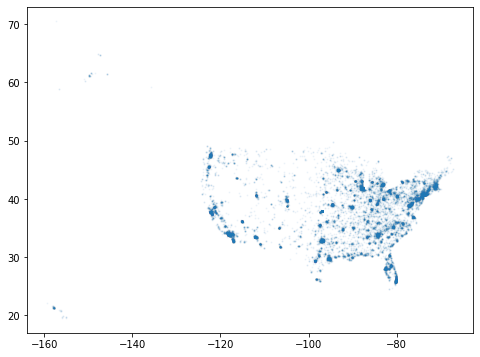

California          2293
Texas               2003
Florida             1425
Kansas              1371
New York            1315
Pennsylvania         970
Illinois             948
Ohio                 914
Georgia              841
North Carolina       759
Michigan             715
New Jersey           669
Virginia             526
Arizona              503
Washington           502
Missouri             480
Wisconsin            472
Indiana              458
Massachusetts        453
Maryland             430
Tennessee            425
Alabama              412
Minnesota            405
Colorado             394
South Carolina       386
Kentucky             373
Louisiana            366
Oklahoma             293
Arkansas             262
Mississippi          241
Oregon               235
Iowa                 228
Connecticut          226
Nevada               187
Utah                 164
West Virginia        161
Nebraska             144
New Mexico           133
Maine                113
Idaho                 99


State           City       
Kansas          Peabody        1152
Texas           Houston         238
California      Los Angeles     179
Illinois        Chicago         144
Arizona         Phoenix         142
                               ... 
California      Dixon             1
Louisiana       Sulphur           1
                Springhill        1
North Carolina  Williamston       1
California      Mariposa          1
Name: lat, Length: 6660, dtype: int64

### Question #4:

Is there anything wrong with these states?

,attack,att_pc
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821
Pennsylvania,970,0.040439
Illinois,948,0.039521
Ohio,914,0.038104
Georgia,841,0.035061
North Carolina,759,0.031642


### Question #5:

Are the attack occurances in each state related to state population?

Try a bar chart!

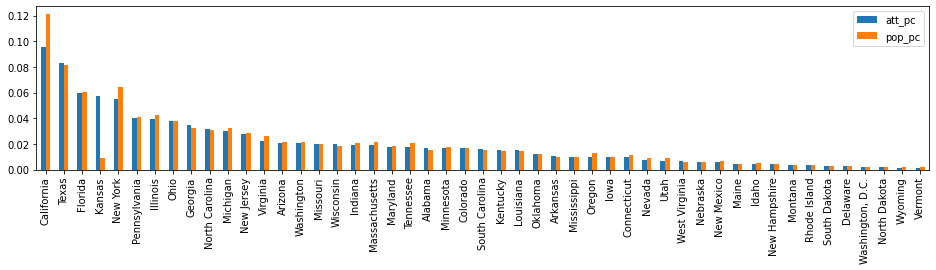

### UFO?

Try to use county-data.csv data to predict the attack counts for each state by liner regression.

Which feature is the best?

,pop,income,ipaddr,ufo2010,attack,att_pc,pop_pc
alabama,4822023.0,2522962.0,22542601.0,250.0,412,0.017176,0.015540
arizona,6532974.0,612727.0,62062174.0,1250.0,503,0.020970,0.021054
arkansas,2949131.0,2677866.0,4810526.0,265.0,262,0.010923,0.009504
california,38041430.0,3241756.0,156511903.0,3769.0,2293,0.095593,0.122596
colorado,5129284.0,3206281.0,22787577.0,513.0,394,0.016426,0.016530
connecticut,3590347.0,565060.0,40993589.0,280.0,226,0.009422,0.011571
delaware,917092.0,172156.0,19378182.0,74.0,68,0.002835,0.002956
district of columbia,632323.0,61835.0,10759507.0,1.0,57,0.002376,0.002038
florida,19317568.0,2990011.0,23716071.0,1465.0,1425,0.059407,0.062255
georgia,9919945.0,6433814.0,20947043.0,548.0,841,0.035061,0.031969



median_house_value = 
 +6.122032984138616e-05 * pop
 +4.277635450980529e-05 * income
 +1.3965378813110904e-07 * ipaddr
 -0.02791476271308256 * ufo2010
 -10.960810232575625


In [ ]:
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attack   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              204.0
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                    3.22e-28
Time:                        08:15:20   Log-Likelihood:                         -317.50
No. Observations:                  49   AIC:                                      643.0
Df Residuals:                      45   BIC:                                      650.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop         6.164e-05   9.87e-06      6.249      0.000    4.18e-05    8.15e-05
income      4.027e-05   1.09e-05      3.698      0.001    1.83e-05    6.22e-05
ipaddr       1.24e-07   7.29e-07      0.170      0.866   -1.35e-06    1.59e-06
ufo2010       -0.0336      0.102     -0.330      0.743      -0.239       0.171
==============================================================================
Omnibus:                       94.798   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2341.410
Skew:                           5.411   Prob(JB):                         0.00
Kurtosis:                      35.089   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional Materials

### GeoPy

Realtime network-based query. 
May limit query frequency.

https://geopy.readthedocs.io/en/stable/

In [ ]:
!pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-application")
coordinates = "53.480837, -2.244914"
location = geolocator.reverse(coordinates)
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Eagle Insurance Buildings, 68, Cross Street, City Centre, Manchester, Greater Manchester, North West England, England, M2 4NJ, United Kingdom
(53.4809597, -2.2450668274629235)
{'place_id': 111898782, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 37139875, 'lat': '53.4809597', 'lon': '-2.2450668274629235', 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, City Centre, Manchester, Greater Manchester, North West England, England, M2 4NJ, United Kingdom', 'address': {'building': 'Eagle Insurance Buildings', 'house_number': '68', 'road': 'Cross Street', 'suburb': 'City Centre', 'city': 'Manchester', 'county': 'Greater Manchester', 'state_district': 'North West England', 'state': 'England', 'postcode': 'M2 4NJ', 'country': 'United Kingdom', 'country_code': 'gb'}, 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576']}


### Reverse Geocode

In [ ]:
!pip install reverse-geocode

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637841 sha256=4a7901c8c98bbb5dfd1b414050300d1fcf212a01b33925542e0aef64ae890537
  Stored in directory: /root/.cache/pip/wheels/34/fd/8c/204b58f530154e61f182bcf1813a53b3ad5844faaff3df51d6
Successfully built reverse-geocode


In [ ]:
# need a package that can convert lat,long to contury code
# https://pypi.org/project/reverse-geocode/

import reverse_geocode

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocode.search(coordinates)

print(results[0])

{'country_code': 'GB', 'city': 'Bayswater', 'country': 'United Kingdom'}


### Reverse Geocoder

https://github.com/thampiman/reverse-geocoder


In [ ]:
 !pip install reverse_geocoder

In [ ]:
import reverse_geocoder

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocoder.search(coordinates) # default mode = 2

print(dict(results[0]))

{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}


In [ ]:
s_ = sample_df[:10]